In [36]:
import kaggle

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.competition_download_file('time-series-classification-part-1','ETTh1_without_missing.csv')

ETTh1_without_missing.csv: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
import csv
def partionnage(chemin):
    row=[]
    with open(chemin, 'r') as file:
        i=0
        reader = csv.reader(file, delimiter=';')
        new_row={}
        for row in reader:
            if(i!=0):
                temp_dic={}
                temp_dic["date"]=(row[0].split(","))[1].split(" ")[0]
                temp_dic["heure"]=int((row[0].split(","))[1].split(" ")[1].split(":")[0])
                temp_dic["OT"]=float((row[0].split(","))[2])
                new_row[int((row[0].split(","))[0])]=temp_dic
            i=i+1
        return new_row
    

data=partionnage('ETTh1_without_missing.csv')



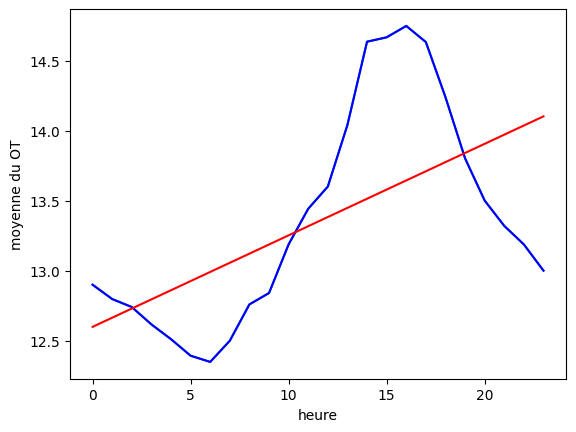

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def meanByHour(data):
    numberOfHours=[0 for i in range(0,24)]
    OTmean=[0 for i in range(0,24)]
    i=0
    for i,k in data.items():
        numberOfHours[k["heure"]]=numberOfHours[k["heure"]]+1
        OTmean[k["heure"]]=OTmean[k["heure"]]+k["OT"]    
    return [j / i for j, i in zip(OTmean, numberOfHours)]


def regressionHeure(data,number):
    regression_model = LinearRegression()
    regression_model.fit(np.array([i for i in range(0,24)]).reshape(-1, 1), meanByHour(data))
    y_predicted = regression_model.predict(np.array([[0]]))
    return regression_model.predict(np.array([[number]]))

meanByHour(data)
def graph(data):
    plt.plot([i for i in range(0,24)],meanByHour(data))
    plt.plot([i for i in range(0,24)],meanByHour(data),color='b', label='Courbe 2')
    plt.plot([i for i in range(0,24)],[regressionHeure(data,i) for i in range(24)],color='r', label='Regression lineaire')
    plt.xlabel('heure')
    plt.ylabel('moyenne du OT')
    plt.show()
  


graph(data)



721.0


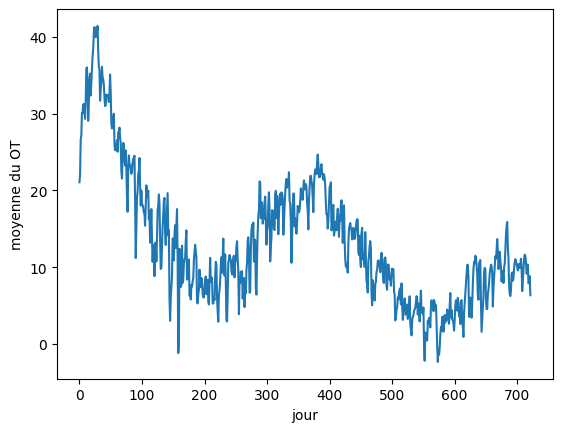

In [39]:
def meanByDay(data):
    print((len(data)-16)/24)
    OTmean=[0 for i in range(int((len(data)-16)/24)+1)]
    numberOfDay=0
    hour=0
    for i,k in data.items():
        OTmean[numberOfDay]=OTmean[numberOfDay]+k["OT"]
        hour=hour+1
        if(hour==24):
            hour=0
            OTmean[numberOfDay]=OTmean[numberOfDay]/24
            numberOfDay=numberOfDay+1
    OTmean[len(OTmean)-1]=OTmean[len(OTmean)-1]/16
    return OTmean


def graphOTbyDay(data):
    AllDay=[i for i in range(722)]
    plt.plot(AllDay,meanByDay(data))
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

graphOTbyDay(data)

[13.53310741]


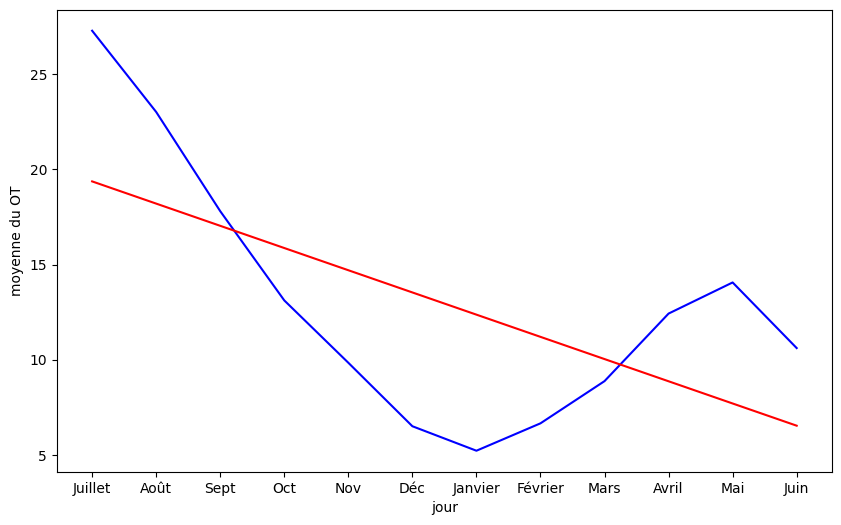

In [40]:
def meanByMonth(data):
    OTmean=[0 for i in range(int((len(data)-16)/(24*31))+1)]
    numberOfDay=0
    month=0
    for i,k in data.items():
        OTmean[numberOfDay]=OTmean[numberOfDay]+k["OT"]
        month=month+1
        if(month==24*31):
            month=0
            OTmean[numberOfDay]=OTmean[numberOfDay]/(24*31)
            numberOfDay=numberOfDay+1
    OTmean[len(OTmean)-1]=OTmean[len(OTmean)-1]/((24*31)+16)
    OTmonth=[0 for i in range(12)]
    for i in range(0,12):
        OTmonth[i]=(OTmean[i]+OTmean[i+12])/2
    return OTmonth


def graphOTbyMonth(data):
    plt.figure(figsize=(10, 6))  
    AllMonth=[
    "Juillet",
    "Août",
    "Sept",
    "Oct",
    "Nov",
    "Déc",
    "Janvier",
    "Février",
    "Mars",
    "Avril",
    "Mai",
    "Juin"
]
    plt.plot(AllMonth,meanByMonth(data))
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()
    
def LinearRegressionOfMonth(data):
    plt.figure(figsize=(10, 6))  
    AllMonth=[
    "Juillet",
    "Août",
    "Sept",
    "Oct",
    "Nov",
    "Déc",
    "Janvier",
    "Février",
    "Mars",
    "Avril",
    "Mai",
    "Juin"
]
    regression_model = LinearRegression()
    regression_model.fit(np.array([i for i in range(len(meanByMonth(data)))]).reshape(-1, 1), meanByMonth(data))
    y_predicted = regression_model.predict(np.array([[0]]))
    print(regression_model.predict(np.array([[5]])))
    plt.plot(AllMonth,meanByMonth(data),color='b', label='Courbe 2')
    plt.plot(AllMonth,[regression_model.predict(np.array([[i]])) for i in range(12)],color='r', label='Regression lineaire')
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

LinearRegressionOfMonth(data)

[22.61095057]


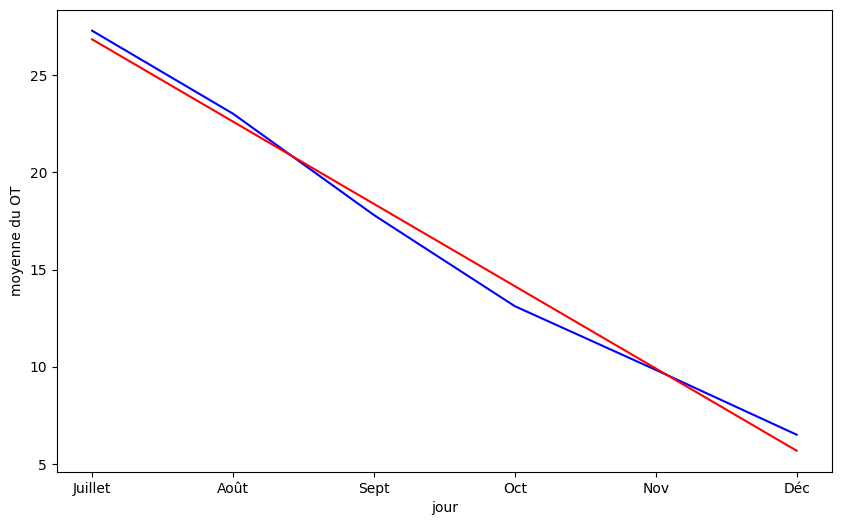

[7.37799456]


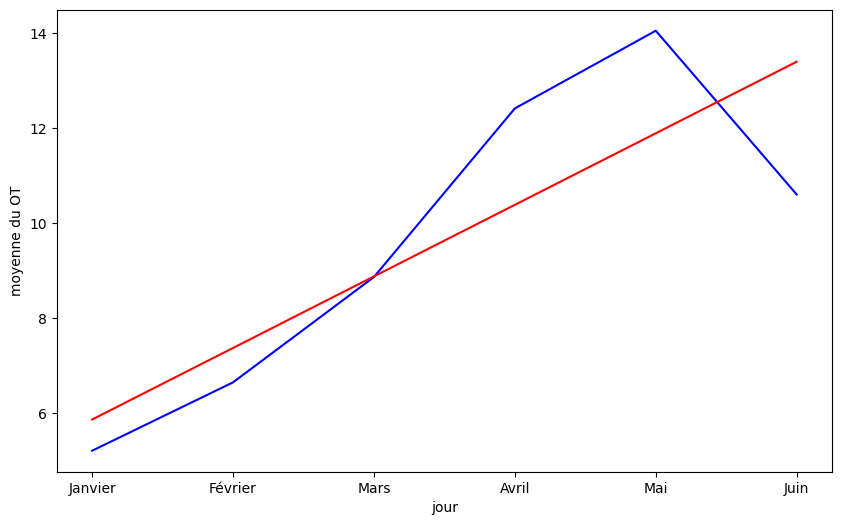

In [41]:
def LinearRegressionOfSummerGraph(data):
    plt.figure(figsize=(10, 6))  
    AllMonth=[
    "Juillet",
    "Août",
    "Sept",
    "Oct",
    "Nov",
    "Déc"]   
    summer= meanByMonth(data)
    regression_model = LinearRegression()
    regression_model.fit(np.array([i for i in range(6)]).reshape(-1, 1), summer[0:6])
    y_predicted = regression_model.predict(np.array([[0]]))
    print(regression_model.predict(np.array([[1]])))
    plt.plot(AllMonth,summer[0:6],color='b', label='Courbe 2')
    plt.plot(AllMonth,[regression_model.predict(np.array([[i]])) for i in range(6)],color='r', label='Regression lineaire')
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()
    
def LinearRegressionOfWinterGraph(data):
    plt.figure(figsize=(10, 6))  
    AllMonth=[
        "Janvier",
        "Février",
        "Mars",
        "Avril",
        "Mai",
        "Juin"
]   
    summer= meanByMonth(data)
    regression_model = LinearRegression()
    regression_model.fit(np.array([i for i in range(6)]).reshape(-1, 1), summer[6:12])
    y_predicted = regression_model.predict(np.array([[0]]))
    print(regression_model.predict(np.array([[1]])))
    plt.plot(AllMonth,summer[6:12],color='b', label='Courbe 2')
    plt.plot(AllMonth,[regression_model.predict(np.array([[i]])) for i in range(6)],color='r', label='Regression lineaire')
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

LinearRegressionOfSummerGraph(data)
LinearRegressionOfWinterGraph(data)

In [57]:
def LinearRegressionOfWinter(data,number): 
    summer= meanByMonth(data)
    regression_model = LinearRegression()
    regression_model.fit(np.array([i for i in range(6)]).reshape(-1, 1), summer[6:12])
    y_predicted = regression_model.predict(np.array([[0]]))
    return regression_model.predict(np.array([[number]]))

def LinearRegressionOfSummer(data,number):
    summer= meanByMonth(data)
    regression_model = LinearRegression()
    regression_model.fit(np.array([i for i in range(6)]).reshape(-1, 1), summer[0:6])
    y_predicted = regression_model.predict(np.array([[0]]))
    return regression_model.predict(np.array([[number]]))

print(LinearRegressionOfSummer(data,1))
print(LinearRegressionOfWinter(data,1))



def AlgorithmOfPrediction(data,date,heure):
    
    jour=int(date.split(" ")[0].split("-")[2])
    mois=int(date.split(" ")[0].split("-")[1])
    if(6<mois):
        number=(mois-7)+(jour/31)
        prediction=LinearRegressionOfSummer(data,number)
        if(heure>10 and heure<20):
            prediction=prediction+2
        else:
            prediction=prediction-2
    else:
        number=(mois)+(jour/31)
        prediction=LinearRegressionOfWinter(data,number)
        if(heure>10 and heure<20):
            prediction=prediction+2
        else:
            prediction=prediction-2
        
    
    return prediction


[22.61095057]
[7.37799456]


In [91]:
import random
def mean_absolute_error(data): 
    
    total_error = 0
    liste=[]
    for i in range(100):
        nombre_aleatoire = random.randint(0, 17319)
        liste.append(nombre_aleatoire)
        total_error += abs(data[nombre_aleatoire]["OT"] - AlgorithmOfPrediction(data,data[nombre_aleatoire]["date"],data[nombre_aleatoire]["heure"]))
    
    mae = total_error / 100
    return mae

print(mean_absolute_error(data))

[4.70801269]
